<a href="https://colab.research.google.com/github/ckypros/CS4650HW5/blob/main/Google%20Collab%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install spacy and newapi-python

In [1]:
!pip install spacy

In [2]:
!pip install newsapi-python

### Download spaCy English Model in it's largest size

In [59]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 45.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


### Python imports

In [62]:
import spacy
from newsapi.newsapi_client import NewsApiClient
import en_core_web_lg
import json
import pandas as pd
from string import punctuation
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Initialize NLP and NewsApiClient with free News API key

In [71]:
nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='a5b88c25b9334b87b9fb6ac27fc73449')

`get_articles` function used to retrieve artcles from specified page argument.  

Articles are requested for pages 1-6.

Then, the articles are pretty printed in their dict form like a JSON.

In [64]:
def get_articles(pagina):
  return newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-28', to='2022-03-29', sort_by='relevancy', page=pagina)
articles = list(map(get_articles, range(1, 6)))
print(json.dumps(articles, indent=4, sort_keys=True))

[
    {
        "articles": [
            {
                "author": "Lauren Hilgers, John Woo, Aaron Esposito, Jack D\u2019Isidoro, Marion Lozano and Zachary Mouton",
                "content": "There are a lot of ways to listen to The Daily. Heres how.\r\nWe want to hear from you. Tune in, and tell us what you think. Email us at thedaily@nytimes.com. Follow Michael Barbaro on Twitter: @mikieb\u2026 [+501 chars]",
                "description": "As the coronavirus spread, demand for nurses came from every corner. Some traveling jobs paid more than $10,000 a week. Will the boom last?",
                "publishedAt": "2022-03-27T10:00:07Z",
                "source": {
                    "id": null,
                    "name": "New York Times"
                },
                "title": "The Sunday Read: \u2018Nurses Have Finally Learned What They\u2019re Worth\u2019",
                "url": "https://www.nytimes.com/2022/03/27/podcasts/the-daily/nursing-pandemic-sunday-read.html",
    

Build the DataFrame from the collected articles

In [65]:
dados = []

for i, article in enumerate(articles):
  for value in article['articles']:
    title = value['title']
    date = value['publishedAt']
    description = value['description']
    content = value['content']
    
    dados.append({'title': title, 'date': date, 'desc': description, 'content': content})

df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,The Sunday Read: ‘Nurses Have Finally Learned ...,2022-03-27T10:00:07Z,"As the coronavirus spread, demand for nurses c...",There are a lot of ways to listen to The Daily...
1,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...
2,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers..."
3,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...
4,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...


`get_keywords_eng` retrieves a list of tokenized keywords from the text argument of the specified tags.

In [66]:
def get_keywords_eng(text):
  result = []
  pos_tag = ['PROPN', 'VERB', 'NOUN']
  doc = nlp_eng(text.lower())
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  print(result)
  return result

Assemble the results and their occurences

In [72]:
results = []
for content in df.content.values:
  results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

['lot', 'ways', 'listen', 'daily', 'heres', 'want', 'hear', 'tune', 'tell', 'think', 'email', 'follow', 'michael', 'barbaro', 'twitter', '+501', 'chars']
['ruling', 'instances', 'abuse', 'children', 'reported', 'authorities', 'handled', 'community', 'depart', 'chars']
['mr', 'adams', 'democrat', 'conversations', 'citys', 'business', 'leaders', 'including', 'david', 'solomon', 'chief', 'executive', 'banking', 'firm', 'goldman', 'sachs', 'jonathan', '+1705', 'chars']
['man', 'receiving', 'booster', 'coronavirus', 'vaccine', 'tel', 'aviv', 'moderna', 'cited', 'data', 'israel', 'request.credit', 'amir', 'cohen', 'reuters', 'moderna', 'said', 'thursday', 'asked', '+3031', 'chars']
['months', 'omicron', 'variant', 'drove', 'coronavirus', 'case', 'numbers', 'heights', 'united', 'states', 'scientists', 'health', 'officials', 'bracing', 'swell', 'pandemic', '+10570', 'chars']
['dr', 'jha', 'born', 'bihar', 'state', 'india', 'country', 'parents', 'moved', 'family', 'toronto', 'showed', 'told', '

### Build the Word Cloud

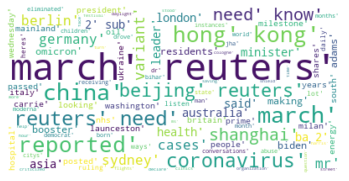

In [70]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()